# Fundamentals of Data Science

## Project Background Information

This project is on an imaginary census dataset of a small town connected by motorways to two or more larger cities. It gives the government precise population numbers to better plan what will be built on an unoccupied piece of land and what to invest in.

## LOAD ALL LIBRARIES AND READ THE CSV

In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

%matplotlib inline

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the csv file
df_census = pd.read_csv('census15.csv')
df_census.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Jones Creek,Katy,Holmes,53,Head,Married,Female,Geophysicist/field seismologist,None,Christian
1,1,Jones Creek,Joseph,Holmes,53,Husband,Married,Male,"Administrator, arts",None,None
2,1,Jones Creek,Joanne,Holmes,12,Daughter,NaN,Female,Student,None,NaN
3,1,Jones Creek,Henry,Holmes,8,Son,NaN,Male,Student,None,NaN
4,1,Jones Creek,Lee,Holmes,5,Son,NaN,Male,Student,None,NaN


## INSPECT THE DATASET

In [3]:
#Check the dataset
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9659 non-null   int64 
 1   Street                         9659 non-null   object
 2   First Name                     9659 non-null   object
 3   Surname                        9659 non-null   object
 4   Age                            9659 non-null   object
 5   Relationship to Head of House  9659 non-null   object
 6   Marital Status                 7224 non-null   object
 7   Gender                         9659 non-null   object
 8   Occupation                     9659 non-null   object
 9   Infirmity                      9659 non-null   object
 10  Religion                       7173 non-null   object
dtypes: int64(1), object(10)
memory usage: 830.2+ KB


In [4]:
#Check for missing data
df_census.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2435
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2486
dtype: int64

In [5]:
#Check for duplicates
df_census.duplicated().sum()

1

## PANDAS PROFILING OF THE DATASET BEFORE CLEANING

In [6]:
census_profiling = ProfileReport(df_census)
census_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Marital Status

In [7]:
#Check for unique features
df_census['Marital Status'].unique()

array(['Married', nan, 'Single', 'Divorced', 'Widowed'], dtype=object)

In [8]:
#Check for no of unique features
df_census['Marital Status'].nunique()

4

In [9]:
#Check for missing values
df_census['Marital Status'].isna().sum()

2435

### Religion

In [10]:
#Check for Religion components
df_census['Religion'].unique()

array(['Christian', 'None', nan, 'Methodist', 'Muslim', 'Catholic',
       'Sikh', ' ', 'Jewish', 'Private', 'Hindu', 'Pagan', 'Nope',
       'Undecided'], dtype=object)

In [11]:
#Check for number of unique features
df_census['Religion'].nunique()

13

In [12]:
#Group each component
df_census['Religion'].value_counts()

None         3175
Christian    2220
Catholic      968
Methodist     596
Muslim        118
Sikh           60
Jewish         25
                3
Nope            3
Pagan           2
Private         1
Hindu           1
Undecided       1
Name: Religion, dtype: int64

In [13]:
#Check for missing values
df_census['Religion'].isna().sum()

2486

### Infirmity

In [14]:
#Check for no of unique features
df_census['Infirmity'].nunique()

8

In [15]:
#Check for unique features
df_census['Infirmity'].unique()

array(['None', 'Blind', 'Unknown Infection', 'Physical Disability',
       'Deaf', ' ', 'Disabled', 'Mental Disability'], dtype=object)

In [16]:
#Group each features
df_census['Infirmity'].value_counts()

None                   9569
Physical Disability      20
Deaf                     19
Unknown Infection        13
                         13
Blind                    11
Mental Disability        11
Disabled                  3
Name: Infirmity, dtype: int64

### Occupation

In [17]:
#Check for unique features
df_census['Occupation'].unique()

array(['Geophysicist/field seismologist', 'Administrator, arts',
       'Student', ..., 'Retired Visual merchandiser',
       'Retired Outdoor activities/education manager', 'Retired Lobbyist'],
      dtype=object)

In [18]:
#Check for no of unique features
df_census['Occupation'].nunique()

1076

In [19]:
#Group each features
df_census['Occupation'].value_counts()

Student                                   1958
Unemployed                                 608
University Student                         601
Child                                      593
Arboriculturist                             20
                                          ... 
Retired Furniture conservator/restorer       1
Retired Designer, graphic                    1
Retired Communications engineer              1
Retired Copy                                 1
Retired Lobbyist                             1
Name: Occupation, Length: 1076, dtype: int64

In [20]:
#Check for blank input
df_census[df_census['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1063,68,Marshkit Crescent,Elliott,Smith,65,Husband,Married,Male,,None,Christian
6301,32,Cellar Drive,Adam,Davies,4,Son,NaN,Male,,None,NaN
9575,1,Booth Factory,Samuel,Morris,1,Son,NaN,Male,,None,NaN


### Gender

In [21]:
#Check for unique features
df_census['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
#Group each features
df_census['Gender'].value_counts()

Female    5041
Male      4618
Name: Gender, dtype: int64

### Relationship to Head of House

In [23]:
#Check unique features
df_census['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', 'Lodger', 'Cousin',
       'Partner', 'None', 'Sibling', 'Wife', 'Visitor', 'Step-Daughter',
       'Step-Son', 'Nephew', 'Granddaughter', 'Grandson', 'Adopted Son',
       'Daughter-in-law', 'Adopted Daughter', ' ', 'Neice', 'Son-in-law',
       'Adopted Grandson'], dtype=object)

In [24]:
#Group each features
df_census['Relationship to Head of House'].value_counts()

Head                3233
Son                 1705
Daughter            1613
Husband              998
None                 701
Lodger               398
Wife                 317
Partner              313
Granddaughter         85
Grandson              83
Sibling               47
Cousin                32
Step-Daughter         29
Nephew                25
Visitor               20
Step-Son              19
Adopted Son           16
Neice                 11
Adopted Daughter      10
Daughter-in-law        1
                       1
Son-in-law             1
Adopted Grandson       1
Name: Relationship to Head of House, dtype: int64

### Age

In [25]:
#Check for unique features
df_census['Age'].unique()

array(['53', '12', '8', '5', '64', '29', '28', '25', '22', '16', '13',
       '6', '2', '71', '35', '23', '21', '46', '50', '11', '4', '0', '19',
       '1', '57', '40', '56', '58', '26', '42', '9', '73', '33', '32',
       '37', '43', '61', '47', '44', '39', '18', '7', '36', '27', '38',
       '52', '55', '72', '79', '17', '10', '41', '87', '20', '49', '94',
       '31', '30', '67', '45', '34', '3', '74', '14', '75', '54', '59',
       '48', '60', '24', '62', '63', '51', '65', '68',
       '59.83785967781853', '61.83785967781853', '7.0', '4.0', '3.0',
       '15', '84', '82', '102', '69', '76', '78', '80', '70', '66',
       '54.78794081141155', '11.0', '8.0', '85', '89',
       '78.57285265232586', '84.57285265232586', '32.0', '30.0', '83',
       '92', '88', '86', '81', '77', '90', '91', '104', '100', '101',
       '107', ' ', '62.771660260988796', '16.0', '12.0',
       '66.58419241082815', '93', '62.359995272292444', '18.0', '103',
       '98', '106', '96', '97'], dtype=object)

In [26]:
#Group each features
df_census['Age'].value_counts()

33                   179
34                   174
38                   170
21                   168
40                   168
                    ... 
84.57285265232586      1
78.57285265232586      1
3.0                    1
4.0                    1
97                     1
Name: Age, Length: 124, dtype: int64

### Surname

In [27]:
#Check for unique features
df_census['Surname'].unique()

array(['Holmes', 'Turner', 'Jones', 'Wright', 'Poole', 'Kent-Poole',
       'Pope', 'Hewitt', 'Robson', 'James', 'Williams', 'Dixon',
       'Nicholls', 'Hale', 'Ashton', 'Fox', 'Austin', 'Lee', 'Smith',
       'McDonald', 'Hill', 'George', 'Pratt', 'Jenkins', 'Hayward',
       'Rowley', 'Potts', 'Stevens', 'Gregory', 'Dodd', 'Noble', 'Ellis',
       'Coates', 'Chapman', 'Rose', 'Bell', 'Wong', 'Savage', 'Hudson',
       'Tomlinson', 'Miller', 'Roberts', 'Taylor', 'Murphy', 'Wilson',
       'Iqbal', 'Hamilton', 'Barker', 'Mills', 'Lewis', 'Rogers',
       'Pearson', 'Stokes', 'Stephenson', 'Evans', 'Giles', 'Jones-Giles',
       'Cameron', 'Black', 'Harris', 'Bennett', 'Townsend', 'Nelson',
       'Duncan', 'Robertson', 'Hughes', 'Thomas', 'Khan', 'Webb',
       'Walker', 'Day', 'Morris', 'Morley', 'Brown', 'Mason', 'Bull',
       'Collier', 'Palmer-Hughes', 'Gough', 'Cross', 'Owen',
       'Robinson-Wilson', 'Rhodes', 'Davison', 'Curtis', "O'Connor",
       'Howe', 'Griffiths', 'Robin

In [28]:
#Check for blank input
df_census[df_census['Surname'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
280,15,Smith Street,Dawn,,47,None,Single,Female,"Producer, television/film/video",None,None
8117,7,Dundee Village,Pamela,,53,Head,Single,Female,Risk analyst,None,Catholic


### First Name

In [29]:
#Check for unique features
df_census['First Name'].unique()

array(['Katy', 'Joseph', 'Joanne', 'Henry', 'Lee', 'Kate', 'Alan',
       'Diane', 'Thomas', 'Nathan', 'Alison', 'Jeremy', 'Rosemary', 'Tom',
       'Leigh', 'Marion', 'Jason', 'Christopher', 'Richard', 'Jade',
       'Fiona', 'Andrew', 'Danny', 'Naomi', 'Gary', 'Barbara', 'Carole',
       'Hayley', 'Nicole', 'Jayne', 'Susan', 'Dominic', 'Kathryn',
       'Leonard', 'Shane', 'Sean', 'Emily', 'Patricia', 'Michelle',
       'Maria', 'Deborah', 'Beverley', 'Hilary', 'Josh', 'Christian',
       'Albert', 'Jamie', 'Diana', 'Denise', 'Carl', 'Caroline', 'Martyn',
       'Helen', 'Mathew', 'Katie', 'Linda', 'Louis', 'Valerie', 'Georgia',
       'Anne', 'Sian', 'Howard', 'Pauline', 'Hazel', 'Joan', 'Stacey',
       'Patrick', 'Kayleigh', 'Phillip', 'Chelsea', 'Tracey', 'Ian',
       'Bryan', 'James', 'Cameron', 'Glenn', 'Nicola', 'Melanie', 'Jill',
       'Bethany', 'Olivia', 'Karl', 'Sarah', 'Max', 'Daniel', 'Ricky',
       'Edward', 'Annette', 'Geraldine', 'Mark', 'Ellie', 'Leanne',
       '

In [30]:
#Investigate further by grouping
df_census['First Name'].value_counts()

Charlotte    41
Hilary       39
Samuel       39
Lynn         39
Hannah       39
             ..
Gavin        14
June         14
Shirley      12
Jacob        11
              2
Name: First Name, Length: 365, dtype: int64

### Street

In [31]:
#Check for unique features
df_census['Street'].unique()

array(['Jones Creek', 'Parry Dale', 'Shaw Street', 'Smith Street',
       'Salamander Drive', 'Marshkit Crescent', 'Cottingham Corners',
       'Toucan Street', 'Hazel Rapid', 'Horseshoe Plaza',
       'Gwynedd Course', 'Ambrosia Road', 'Lewis Cliffs',
       'Testament Avenue', 'Holmes Mills', 'Long Lane', 'Baldwin Divide',
       'Derbynail Drive', 'Protectorate Crescent', 'Foster Brook',
       'Dyer Terrace', 'Minster Avenue', 'Plymouth Lane',
       'Salisburynet Lane', 'Carr Green', 'Edinburgh Crescent',
       'Fowler Ways', 'Regent Drive', 'March Pass', 'March Street',
       'Ward Lane', 'Snapdragon Drive', 'Cross Mountain', 'Shrine Pine',
       'Harris Mission', 'Andrews Track', 'St.John View',
       'Richardson Turnpike', 'Begum Loaf', 'Narwhal Crescent',
       'Coconut Crossing', 'Outertug Avenue', 'McDonald Stravenue',
       'Sims Lane', 'Holly Road', 'Collins Lane', 'Truro Fork',
       'Shaw Fork', 'Butterfly Road', 'King Plains', 'Faithmix Lane',
       'Moore Highw

In [32]:
#Group each features
df_census['Street'].value_counts()

Marshkit Crescent    786
Doherty Green        635
Salamander Drive     524
Outertug Avenue      356
Fountain Lane        308
                    ... 
Durham Cottage         5
Smith Hall             2
Gordon Lodge           2
Whittaker Chalet       2
Beech Obervatory       1
Name: Street, Length: 105, dtype: int64

### House Number

In [33]:
#Check for unique features
df_census['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## QUALITY ISSUES TO ADDRESS:

    * Presence of a duplicate sample
    * Missing values in Marital Status column
    * Missing values in Religion column
    * Inconsistent and blank input in Religion column e.g ' ', Nope, Private, Undecided
    * Blank input in Infirmity column e.g ' '
    * Blank input in Occupation column e.g ' '
    * Misspelling and blank input in Relationship to Head of House e.g Neice, ' '
    * Inconsistent and wrong datatype in Age column e.g 61.83785967781853, 68
    * Blank input in Age column e.g ' '
    * Blank input in Surname e.g ' '
    * Blank input in First Name e.g ' '
    * Rename House Number, First Name, Relationship to Head of House and Marital Status

In [34]:
#Make a copy of the original dataset before cleaning

df = df_census.copy()

## DATA CLEANING

### Issue 1: Duplicates

In [35]:
#Drop the duplicate
df.drop_duplicates(inplace=True)

### Test

In [36]:
df.duplicated().sum()

0

### Issue 2: Inconsistent and wrong datatype and blank input in Age Column

In [37]:
#Row with blank input in Age column

df[df['Age'] == ' '].Age.count()

1

In [38]:
#Investigate further for surname and street
df[df['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4601,81,Coconut Crossing,Alison,Collins,,Daughter,NaN,Female,Child,None,NaN


In [39]:
#Demographic search using Surname and Street

df[(df['Surname'] =='Collins') & (df['Street'] == 'Coconut Crossing')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4597,81,Coconut Crossing,Jake,Collins,40,Head,Married,Male,Equities trader,None,Catholic
4598,81,Coconut Crossing,Maureen,Collins,38,Wife,Married,Female,Environmental health practitioner,None,Catholic
4599,81,Coconut Crossing,Connor,Collins,9,Son,NaN,Male,Student,None,NaN
4600,81,Coconut Crossing,Bernard,Collins,6,Son,NaN,Male,Student,None,NaN
4601,81,Coconut Crossing,Alison,Collins,,Daughter,NaN,Female,Child,None,NaN


In [40]:
'''Temporarily assigned 0 to the blank input since the occupation was a child.'''

#Replace ' ' with 0
df.Age = df['Age'].replace(' ', 0)

#Convert Age column to float
df.Age = df['Age'].astype(float)

#Calculate the median age of people with occupation as child
median_age = df[((df['Age'] <= 4) &  (df['Occupation'] == 'Child'))].median()
median_age['Age']

2.0

In [41]:
#Replace the row with the median age
df.at[4601, 'Age'] = median_age['Age']

#Age cannot be a float hence, convert to int
df.Age = df.Age.astype(int)

### Test

In [42]:
df[df['Age'] == ' '].Age.count()

0

In [43]:
df.Age.dtype

dtype('int32')

### Issue 3: Inconsistent and blank input in Religion Column

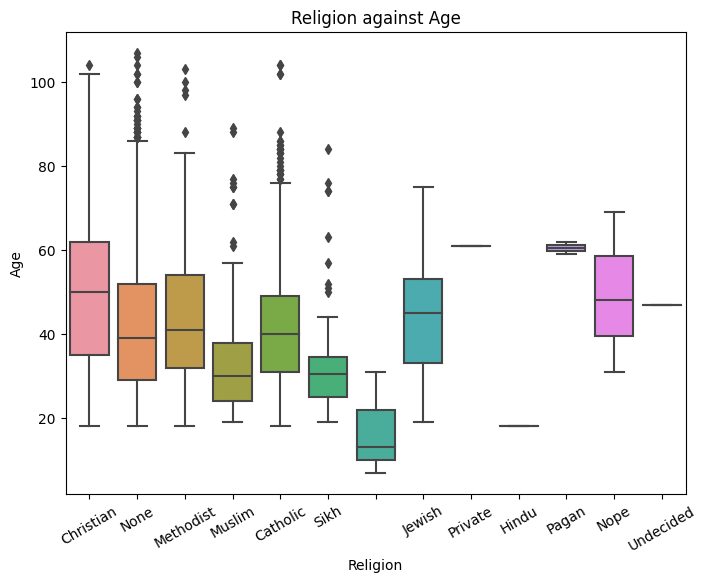

In [44]:
#Check for outliers using boxplot
plt.figure(figsize = [8, 6])
sns.boxplot(data=df, x='Religion', y='Age')#, color=color)
plt.title('Religion against Age')
plt.xticks(rotation=30);

In [45]:
#Check for inconsistency and wrong input

selected = ['Nope','Undecided','Private',' ']
filtered_religion = df[df["Religion"].isin(selected)]
filtered_religion.Religion.count()

8

In [46]:
selected = ['Nope','Undecided','Private',' ']
df[df["Religion"].isin(selected)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
138,9,Parry Dale,Ian,Roberts,13,Son,NaN,Male,Student,None,
1482,178,Marshkit Crescent,Lynn,Ahmed,61,Lodger,Single,Female,Probation officer,None,Private
2019,38,Horseshoe Plaza,Trevor,Kelly,48,Head,Single,Male,Media planner,None,Nope
5234,9,Sims Lane,Angela,Willis,69,Head,Divorced,Female,"Retired Designer, interior/spatial",None,Nope
5296,35,Holly Road,Howard,Hill,47,Head,Single,Male,Exhibition designer,None,Undecided
6021,36,Khan Plains,Damien,Smart,31,Head,Single,Male,Herpetologist,None,Nope
6119,2,Ferguson Coves,Rachel,Wells,31,None,Single,Female,Petroleum engineer,None,
7699,13,Duchess Well,Mohamed,Lloyd,7,Son,NaN,Male,Student,None,


In [47]:
#Inspect each above the age of 18

df[(df['Surname'] == 'Wells') & (df['Street'] == 'Ferguson Coves') & (df['House Number'] == 2)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6119,2,Ferguson Coves,Rachel,Wells,31,None,Single,Female,Petroleum engineer,None,


In [48]:
#Inspect each above the age of 18

df[(df['Surname'] == 'Smart') & (df['Street'] == 'Khan Plains') & (df['House Number'] == 36)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6021,36,Khan Plains,Damien,Smart,31,Head,Single,Male,Herpetologist,None,Nope


In [49]:
#Inspect each above the age of 18

df[(df['Surname'] == 'Ahmed') & (df['Street'] == 'Marshkit Crescent') & (df['House Number'] == 178)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1482,178,Marshkit Crescent,Lynn,Ahmed,61,Lodger,Single,Female,Probation officer,None,Private


In [50]:
#Inspect each above the age of 18

df[(df['Surname'] == 'Kelly') & (df['Street'] == 'Horseshoe Plaza') & (df['House Number'] == 38)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2019,38,Horseshoe Plaza,Trevor,Kelly,48,Head,Single,Male,Media planner,None,Nope


In [51]:
#Inspect each above the age of 18

df[(df['Surname'] == 'Willis') & (df['Street'] == 'Sims Lane') & (df['House Number'] == 9)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5234,9,Sims Lane,Angela,Willis,69,Head,Divorced,Female,"Retired Designer, interior/spatial",None,Nope


In [52]:
#Inspect each above the age of 18

df[(df['Surname'] == 'Hill') & (df['Street'] == 'Holly Road') & (df['House Number'] == 35)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5296,35,Holly Road,Howard,Hill,47,Head,Single,Male,Exhibition designer,None,Undecided


In [53]:
'''There are no religions named Private, Undecided and Nope. It's either the individual chose not to disclose his or her religion or it can be classified as a joke. Assigned Not answered to the blank input since their religions aint known.'''

#Replace ' ','Undecided' and 'Private' with Unknown
df['Religion'] = df['Religion'].replace([' ','Undecided','Private'], 'Unknown')

#Nope can also mean None logically
df['Religion'] = df['Religion'].replace('Nope', 'None')

In [54]:
#These individuals obviously lied because they were below 18 years

minor_lied = ((df['Age'] <= 18) & (df['Religion'] == 'Unknown'))

In [55]:
#Inspect the minors that lied

df[(df['Surname'] == 'Lloyd') & (df['Street'] == 'Duchess Well') & (df['House Number'] == 13)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7696,13,Duchess Well,Amelia,Lloyd,39,Head,Married,Female,TEFL teacher,None,None
7697,13,Duchess Well,Keith,Lloyd,41,Husband,Married,Male,Textile designer,None,None
7698,13,Duchess Well,Charlene,Lloyd,11,Daughter,NaN,Female,Student,None,NaN
7699,13,Duchess Well,Mohamed,Lloyd,7,Son,NaN,Male,Student,None,Unknown
7700,13,Duchess Well,Rita,Lloyd,7,Daughter,NaN,Female,Student,None,NaN


In [56]:
#Replace with head of house religion

df.at[7699, 'Religion'] = 'None'

In [57]:
#Inspect the minors that lied

df[(df['Surname'] == 'Roberts') & (df['Street'] == 'Parry Dale') & (df['House Number'] == 9)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
137,9,Parry Dale,Ann,Roberts,49,Head,Single,Female,Chemical engineer,None,Christian
138,9,Parry Dale,Ian,Roberts,13,Son,NaN,Male,Student,None,Unknown


In [58]:
#Replace with head of house religion

df.at[138, 'Religion'] = 'Christian'

### Test

In [59]:
df['Religion'].value_counts()

None         3179
Christian    2221
Catholic      968
Methodist     596
Muslim        118
Sikh           60
Jewish         25
Unknown         3
Pagan           2
Hindu           1
Name: Religion, dtype: int64

In [60]:
selected = ['Nope','Undecided','Private',' ']
df[df["Religion"].isin(selected)]['Religion'].count()

0

In [61]:
df[minor_lied]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
138,9,Parry Dale,Ian,Roberts,13,Son,NaN,Male,Student,None,Christian
7699,13,Duchess Well,Mohamed,Lloyd,7,Son,NaN,Male,Student,None,None


### Issue 4: Blank input in Infirmity Column

In [62]:
#Check for blank input

df[df['Infirmity'] == ' '].Infirmity.count()

13

In [63]:
#Obtain the mode for individuals between 65 and 85
mode_btw = df.query("Age >= 65 and Age <=85").Infirmity.mode()
print(mode_btw)

#Check for mode of individuals less than 65
below_mode = df.query("Age < 65").Infirmity.mode()
print(below_mode)

0    None
Name: Infirmity, dtype: object
0    None
Name: Infirmity, dtype: object


In [64]:
'''Assigned Unknown to the blank input since they were unwilling to disclose whether they had or not.'''

#Replace ' ' with Unknown
df.Infirmity = df['Infirmity'].replace(' ', 'Unknown')

### Test

In [65]:
df[df['Infirmity'] == ' '].Infirmity.count()

0

### Issue 5: Misspelling and blank input in Relationship Head of House

In [66]:
#Check for blank input

df[df['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1696,16,Cottingham Corners,Hilary,Turner,46,,Single,Female,Arts development officer,None,None


In [67]:
#Obtain more details for the blank input

df[((df['Street'] == 'Cottingham Corners') & (df['Surname'] == 'Turner'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1695,16,Cottingham Corners,Lawrence,Turner,76,Head,Widowed,Male,Unemployed,None,None
1696,16,Cottingham Corners,Hilary,Turner,46,,Single,Female,Arts development officer,None,None
1697,16,Cottingham Corners,Jamie,Turner,44,Son,Divorced,Male,"Biochemist, clinical",None,None
1698,16,Cottingham Corners,Nicola,Turner,42,Daughter,Single,Female,"Scientist, research (physical sciences)",None,None
1699,16,Cottingham Corners,Clive,Turner,39,Son,Divorced,Male,Mechanical engineer,None,None
1700,16,Cottingham Corners,Bethany,Turner,36,Daughter,Single,Female,"Engineer, biomedical",None,None


In [68]:
#Replace with Daughter since the age range is same with neighboring rows

df.at[1696, 'Relationship to Head of House'] = 'Daughter'

In [69]:
#Check Neice samples

df[df['Relationship to Head of House'] == 'Neice'].Age.count()

11

In [70]:
#Filter those with Neice as Relationship to Head of House

df[df['Relationship to Head of House'] == 'Neice']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1844,6,Hazel Rapid,Joanne,Holland,4,Neice,NaN,Female,Child,None,NaN
1845,6,Hazel Rapid,Sylvia,Davies,3,Neice,NaN,Female,Child,None,NaN
1846,6,Hazel Rapid,Amber,Jones-Davies,1,Neice,NaN,Female,Child,None,NaN
3107,32,Dyer Terrace,Samantha,Jones,13,Neice,NaN,Female,Student,None,NaN
3109,32,Dyer Terrace,Rebecca,Doyle,10,Neice,NaN,Female,Student,None,NaN
4658,103,Coconut Crossing,Denise,Smith,8,Neice,NaN,Female,Student,None,NaN
5198,43,McDonald Stravenue,Ruth,Turner,14,Neice,NaN,Female,Student,None,NaN
7017,53,Fountain Lane,Molly,Farrell,1,Neice,NaN,Female,Child,None,NaN
7188,120,Fountain Lane,Charlotte,Taylor,7,Neice,NaN,Female,Student,None,NaN
7660,4,Duchess Well,Teresa,Higgins,6,Neice,NaN,Female,Student,None,NaN


In [71]:
#Replace Neice with Niece

df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('Neice', 'Niece')

### Test

In [72]:
df[df['Relationship to Head of House'] == ' '].Age.count()

0

In [73]:
df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', 'Lodger', 'Cousin',
       'Partner', 'None', 'Sibling', 'Wife', 'Visitor', 'Step-Daughter',
       'Step-Son', 'Nephew', 'Granddaughter', 'Grandson', 'Adopted Son',
       'Daughter-in-law', 'Adopted Daughter', 'Niece', 'Son-in-law',
       'Adopted Grandson'], dtype=object)

### Issue 6: Blank input in First Name

In [74]:
#Check for blank input

df[df['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2978,6,Foster Brook,,Williams,35,None,Single,Female,Diplomatic Services operational officer,None,None
5864,5,Gwynedd Drive,,Clarke,57,Head,Single,Female,Dance movement psychotherapist,None,Christian


In [75]:
#Obtain more details for the blank input

df[((df['Street'] == 'Foster Brook') & (df['Surname'] == 'Williams'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2968,1,Foster Brook,Beth,Williams,71,Head,Widowed,Female,"Retired Therapist, speech and language",None,Christian
2969,1,Foster Brook,Aimee,Williams,43,Daughter,Single,Female,"Programmer, systems",None,None
2978,6,Foster Brook,,Williams,35,None,Single,Female,Diplomatic Services operational officer,None,None


In [76]:
#Obtain more details for the blank input

df[((df['Street'] == 'Gwynedd Drive') & (df['Surname'] == 'Clarke'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5864,5,Gwynedd Drive,,Clarke,57,Head,Single,Female,Dance movement psychotherapist,None,Christian
5865,5,Gwynedd Drive,Robert,Clarke,16,Son,NaN,Male,Student,None,NaN
5866,5,Gwynedd Drive,Donald,Clarke,15,Son,NaN,Male,Student,None,NaN
5867,5,Gwynedd Drive,Helen,Clarke,12,Daughter,NaN,Female,Student,None,NaN
5868,5,Gwynedd Drive,Paula,Clarke,10,Daughter,NaN,Female,Student,None,NaN
5869,5,Gwynedd Drive,Trevor,Clarke,10,Son,NaN,Male,Student,None,NaN
5870,5,Gwynedd Drive,Andrea,Clarke,9,Daughter,NaN,Female,Student,None,NaN


In [77]:
#Replace blank with unspecified since first name can't be ascertained

df['First Name'] = df['First Name'].replace(' ', 'Unspecified')

### Test

In [78]:
df[df['First Name'] == ' ']['First Name'].count()

0

### Issue 7: Blank input in Surname

In [79]:
#Check for blank input

df[df['Surname']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
280,15,Smith Street,Dawn,,47,None,Single,Female,"Producer, television/film/video",None,None
8117,7,Dundee Village,Pamela,,53,Head,Single,Female,Risk analyst,None,Catholic


In [80]:
#Further Investigation of each individual

df[(df['Street'] == 'Smith Street') & (df['House Number'] == 15)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
278,15,Smith Street,Harry,Thomas,23,Head,Single,Male,"Engineer, site",None,None
279,15,Smith Street,Robert,Harvey,34,None,Single,Male,"Engineer, aeronautical",None,Christian
280,15,Smith Street,Dawn,,47,None,Single,Female,"Producer, television/film/video",None,None
281,15,Smith Street,Marion,Owen,43,None,Single,Female,Legal executive,None,None
282,15,Smith Street,James,Barton,32,None,Single,Male,Commercial art gallery manager,None,Christian
283,15,Smith Street,Chelsea,Hale,33,None,Single,Female,Chiropodist,None,Christian
284,15,Smith Street,Lorraine,Taylor,21,None,Single,Female,University Student,None,Muslim
285,15,Smith Street,Guy,Lewis,51,None,Single,Male,"Engineer, maintenance",None,None
286,15,Smith Street,George,Gibbs,26,None,Single,Male,Politician's assistant,None,None
287,15,Smith Street,Emma,Wood,23,None,Single,Female,Professor Emeritus,None,None


In [81]:
#Further investigate each individual with blank input as surname

df[(df['Street'] == 'Dundee Village') & (df['House Number'] == 7)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8117,7,Dundee Village,Pamela,,53,Head,Single,Female,Risk analyst,None,Catholic


In [82]:
'''Assigned Unspecified to the blank input since their Surname cant be figured.'''

#Replace ' ' with Unknown
df['Surname'] = df['Surname'].replace(' ', 'Unspecified')

### Test

In [83]:
df[df['Surname']==' '].Surname.count()

0

### Issue 8: Blank input in Occupation

In [84]:
#Check for blank input

df[df['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1063,68,Marshkit Crescent,Elliott,Smith,65,Husband,Married,Male,,None,Christian
6301,32,Cellar Drive,Adam,Davies,4,Son,NaN,Male,,None,NaN
9575,1,Booth Factory,Samuel,Morris,1,Son,NaN,Male,,None,NaN


In [85]:
#Check mode of individuals below 5

df[(df['Age'] < 5)].Occupation.mode()

0    Child
Name: Occupation, dtype: object

In [86]:
#Check mode of individuals between 65 and 70

df.query("Age >= 65 and Age <=70").Occupation.mode()

0    Unemployed
Name: Occupation, dtype: object

In [87]:
#Using FOR loop, replace each automatically with the above outcomes based on demography
for no, line in df.iterrows():
    if line['Occupation'] == ' ' and line['Age'] >= 65:
        df.at[no, 'Occupation'] = 'Unemployed'
    elif line['Occupation'] == ' ' and line['Age'] < 5:
        df.at[no, 'Occupation'] = 'Child'

### Test

In [88]:
df[df['Occupation'] == ' '].Occupation.count()

0

In [89]:
df[(df['First Name'] == 'Elliott') & (df['Surname'] == 'Smith')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1063,68,Marshkit Crescent,Elliott,Smith,65,Husband,Married,Male,Unemployed,None,Christian


### Issue 9: Missing values in Marital Status column

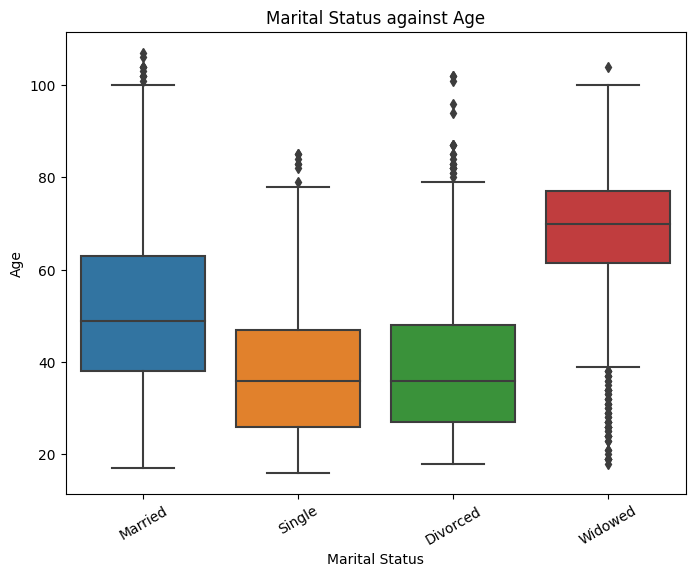

In [90]:
#Plot a box plot of Age against Religion
plt.figure(figsize = [8, 6])
sns.boxplot(data=df, x='Marital Status', y='Age')#, color=color)
plt.title('Marital Status against Age')
plt.xticks(rotation=30);

In [91]:
#Individuals with missing values
df[df['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Jones Creek,Joanne,Holmes,12,Daughter,NaN,Female,Student,None,NaN
3,1,Jones Creek,Henry,Holmes,8,Son,NaN,Male,Student,None,NaN
4,1,Jones Creek,Lee,Holmes,5,Son,NaN,Male,Student,None,NaN
10,2,Jones Creek,Alison,Jones,16,Daughter,NaN,Female,Student,None,NaN
11,2,Jones Creek,Jeremy,Jones,13,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9642,1,Bradshaw Castle,Justin,Freeman,10,Son,NaN,Male,Student,None,NaN
9643,1,Bradshaw Castle,Ashleigh,Freeman,6,Daughter,NaN,Female,Student,None,NaN
9644,1,Bradshaw Castle,Elaine,Freeman,4,Daughter,NaN,Female,Child,None,NaN
9645,1,Bradshaw Castle,Jenna,Freeman,2,Daughter,NaN,Female,Child,None,NaN


In [92]:
#Check total no of missing values using sum

df[df['Age'] < 18]['Marital Status'].isna().sum()

2434

In [93]:
#All Ages below 18 should be replaced with Minor as Marital Status

df['Marital Status'] = df['Marital Status'].replace(np.nan, 'Minor')

### Test

In [94]:
df['Marital Status'].isna().sum()

0

In [95]:
df['Marital Status'].unique()

array(['Married', 'Minor', 'Single', 'Divorced', 'Widowed'], dtype=object)

### Issue 10: Missing values in Religion column

In [96]:
#Check for total no of missing values that are less than 18

df[df['Age'] < 18]['Religion'].isna().sum()

2435

In [97]:
#Check for total no of missing values that are 18 and above
df[df['Age'] >= 18]['Religion'].isna().sum()

50

In [98]:
#Using FOR loop, replace individuals below 18 with the religion of their head of house
surname = []
house_no = []
religion = []
street = []

for no, line in df.iterrows():
    if line['Relationship to Head of House'] == 'Head':
        surname = line['Surname']
        house_no = line['House Number']
        religion = line['Religion']
        street = line['Street']
    elif line['Surname'] == surname and line['House Number'] == house_no and line['Street'] == street:
        if line['Age'] < 18 and pd.isnull(line['Religion']):
            df.at[no, 'Religion'] = religion

In [99]:
#Individuals with no head of house with missing values in religion column

df['Religion'].isnull().sum()

444

In [100]:
#Filter individuals that are 18 and above that have missing value in religion column

df[(df['Age'] >= 18) & (df['Religion'].isnull())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
163,9,Shaw Street,Beverley,Stokes,18,None,Single,Female,Student,None,NaN
753,123,Salamander Drive,Janice,Clarke,18,None,Single,Female,University Student,None,NaN
1274,125,Marshkit Crescent,Sharon,Lee,18,Lodger,Single,Female,Student,None,NaN
1540,194,Marshkit Crescent,Frank,Mills,25,Partner,Single,Male,Radiation protection practitioner,None,NaN
1973,19,Horseshoe Plaza,Sheila,Harvey,18,Head,Divorced,Female,Student,None,NaN
2116,22,Gwynedd Course,Leon,Thompson,18,Lodger,Single,Male,Student,None,NaN
2241,73,Gwynedd Course,Lucy,Marshall,18,None,Single,Female,Student,None,NaN
2489,10,Testament Avenue,Declan,Brown,18,None,Single,Male,Student,None,NaN
2555,29,Holmes Mills,Tracy,Blake,18,Head,Single,Female,Student,None,NaN
2563,35,Holmes Mills,Carl,Richardson,18,Head,Single,Male,Student,None,NaN


In [101]:
# Checking each individual

df[((df['Age'] >= 18)  & (df['Street'] == 'Shaw Street') & (df['House Number'] == 9) & (df['Surname'] == 'Stokes'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
163,9,Shaw Street,Beverley,Stokes,18,None,Single,Female,Student,None,NaN


In [102]:
# Checking each individual

df[((df['Age'] >= 18)  & (df['Street'] == 'Salamander Drive') & (df['House Number'] == 123) & (df['Surname'] == 'Clarke'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
753,123,Salamander Drive,Janice,Clarke,18,None,Single,Female,University Student,None,NaN


In [103]:
# Checking each individual

df[((df['Age'] >= 18)  & (df['Street'] == 'Marshkit Crescent') & (df['House Number'] == 125) & (df['Surname'] == 'Lee'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1274,125,Marshkit Crescent,Sharon,Lee,18,Lodger,Single,Female,Student,None,NaN


In [104]:
# Checking each individual

df[((df['Age'] >= 18)  & (df['Street'] == 'Marshkit Crescent') & (df['House Number'] == 194) & (df['Surname'] == 'Mills'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1540,194,Marshkit Crescent,Frank,Mills,25,Partner,Single,Male,Radiation protection practitioner,None,NaN


In [105]:
# Checking each individual

df[((df['Age'] >= 18)  & (df['Street'] == 'Holmes Mills') & (df['House Number'] == 106) & (df['Surname'] == "O'Connor"))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2674,106,Holmes Mills,Elliott,O'Connor,18,Lodger,Single,Male,Student,None,NaN


In [106]:
# Checking each individual

df[((df['Age'] >= 18)  & (df['Street'] == 'Giles River') & (df['House Number'] == 76) & (df['Surname'] == "Wilkinson"))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8438,76,Giles River,Donald,Wilkinson,29,Husband,Married,Male,"Scientist, clinical (histocompatibility and im...",None,NaN


In [107]:
# Checking each individual

df[((df['Age'] >= 18)  & (df['Street'] == 'Fountain Lane') & (df['House Number'] == 104) & (df['Surname'] == "Bruce"))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7142,104,Fountain Lane,Holly,Bruce,19,Partner,Single,Female,University Student,None,NaN


In [108]:
'''After inspecting individually and realising there were no common religion based on surname, house number and street, we check for common demographic groups'''

#Inspect their demographies based on Age, Marital Status, Gender

print(df[((df['Age'] >= 18) & (df['Age'] <= 25) & (df['Marital Status'] == 'Single') & (df['Gender'] == 'Female'))]['Religion'].mode())

print(df[((df['Age'] >= 18) & (df['Age'] <= 25) & (df['Marital Status'] == 'Single') & (df['Gender'] == 'Male'))]['Religion'].mode())

print(df[((df['Age'] >= 18) & (df['Age'] <= 25) & (df['Marital Status'] == 'Married') & (df['Gender'] == 'Female'))]['Religion'].mode())

print(df[((df['Age'] >= 18) & (df['Age'] <= 25) & (df['Marital Status'] == 'Married') & (df['Gender'] == 'Male'))]['Religion'].mode())

print(df[((df['Age'] >= 26) & (df['Age'] <= 35) & (df['Marital Status'] == 'Married') & (df['Gender'] == 'Male'))]['Religion'].mode())

0    None
Name: Religion, dtype: object
0    None
Name: Religion, dtype: object
0    None
Name: Religion, dtype: object
0    None
Name: Religion, dtype: object
0    None
Name: Religion, dtype: object


In [109]:
#Replace all filtered with Unknown since they all had None in common upon further investigation

Over18 = (df['Age'] >= 18) & (df['Religion'].isnull())

df.loc[Over18, 'Religion'] = 'Unknown'

In [110]:
#Replace all filtered with Unknown since they

Under18 = (df['Age'] < 18) & (df['Religion'].isnull())

df.loc[Under18, 'Religion'] = 'Unknown'

### Test

In [111]:
df['Religion'].unique()

array(['Christian', 'None', 'Unknown', 'Methodist', 'Muslim', 'Catholic',
       'Sikh', 'Jewish', 'Hindu', 'Pagan'], dtype=object)

In [112]:
df[(df['Age'] >= 18) & (df['Religion'] == 'Undeclared')]['Age'].count()

0

### Issue 11: Rename House Number, First Name, Relationship to Head of House and Marital Status

In [113]:
#Rename by replace space with underscore

df.rename(columns=lambda x: x.replace(' ','_'),inplace=True)

### Test

In [114]:
df.columns

Index(['House_Number', 'Street', 'First_Name', 'Surname', 'Age',
       'Relationship_to_Head_of_House', 'Marital_Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

## CLEANING EXTENSION

Upon further inspection, we notice certain discrepancies which needs to be addressed immediately so as to avoid bias and promote originality. These discrepancies include:

* Ages below 18 that are either married, head of house staying alone, those with a child or 18 years that are divorced
* Overaged who are unemployed that are due for retirement 

### Issue 12: Ages below 18 that are either married, head of house staying alone, those with a child or 18 years that are divorced

In [115]:
#Filter those below 18 that her married

'''The legal age for marriage in the uk is 18, hence, this should dropped'''

df[((df['Age']>=16) & (df['Age'] <= 17) & (df['Marital_Status'] == 'Married'))]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1651,9,Cottingham Corners,Jessica,Smith,17,Head,Married,Female,Student,None,Unknown


In [116]:
#Further Investigate the individual using Street and House number

smith_family = ((df['Street'] == 'Cottingham Corners') & (df['House_Number'] == 9) & (df['Surname'] == 'Smith'))

# Change Relationship to single

df.loc[smith_family, 'Marital_Status'] = 'Single'

In [117]:
'''You need to have been married for atleast a year before you can file for divorce. The individual in question is currently 18 years old, which isnt legally possible. https://www.gov.uk/divorce'''

#Replace 18 years old that are divorced with Single
divorced_18 = (df['Age']>=16) & (df['Age'] <= 18) & (df['Marital_Status'] == 'Divorced')

#Replace Divorced with Single
df.loc[divorced_18, 'Marital_Status'] = 'Single'

In [118]:
#Filter individual between 16 and 18 that are widowed.

df[((df['Age'] <= 18) & (df['Marital_Status'] == 'Widowed'))]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3022,8,Dyer Terrace,Charlie,Lewis,18,Son,Widowed,Male,Student,None,None


In [119]:
'''An 18 years old individual can be widowed but must be a Head for this to be valid. Further investigation shows he has elderly ones still single, hence, it makes no logical sense for him to be widowed'''

#Further investigation on the family
df[((df['Street'] == 'Dyer Terrace') & (df['Surname'] == 'Lewis'))]

#Replace with mode
df.at[3022, 'Marital_Status'] = 'Single'

In [120]:
#Filter further to check for underage single mothers. Noticed 17 and 16 years old respectively, we investigate both

df[((df['Age']<=17) & (df['Relationship_to_Head_of_House'] == 'Head') & (df['Marital_Status'] == 'Single'))]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1539,194,Marshkit Crescent,Diane,Smith,17,Head,Single,Female,Student,None,Unknown
1651,9,Cottingham Corners,Jessica,Smith,17,Head,Single,Female,Student,None,Unknown
2071,7,Gwynedd Course,Sheila,Whitehouse,16,Head,Single,Female,Unemployed,None,Unknown


In [121]:
#Further Investigation into their background

df[((df['Surname'] == 'Whitehouse') & (df['House_Number'] == 7) & (df['Street'] == 'Gwynedd Course'))]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2071,7,Gwynedd Course,Sheila,Whitehouse,16,Head,Single,Female,Unemployed,None,Unknown
2072,7,Gwynedd Course,Daniel,Whitehouse,0,Son,Minor,Male,Child,None,Unknown


In [122]:
#Further investigation into their background

df[((df['Surname'] == 'Smith') & (df['House_Number'] == 194) & (df['Street'] == 'Marshkit Crescent'))]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1539,194,Marshkit Crescent,Diane,Smith,17,Head,Single,Female,Student,None,Unknown
1541,194,Marshkit Crescent,Terence,Smith,0,Son,Minor,Male,Child,None,Unknown


**Individuals between 16 and 18 are allowed to move out hence, we keep both households**

### Test

In [123]:
print(df[((df['Surname'] == 'Smith') & (df['House_Number'] == 194) & (df['Street'] == 'Marshkit Crescent'))]['Age'].count())

print(df[((df['Age']>=16) & (df['Age'] <= 17) & (df['Marital_Status'] == 'Married'))]['Marital_Status'].count())

print(df[((df['Surname'] == 'Whitehouse') & (df['House_Number'] == 7) & (df['Street'] == 'Gwynedd Course'))]['Age'].count())

2
0
2


In [124]:
df[((df['Street'] == 'Dyer Terrace') & (df['Surname'] == 'Lewis'))]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3019,8,Dyer Terrace,Dorothy,Lewis,47,Head,Divorced,Female,"Surveyor, hydrographic",None,None
3020,8,Dyer Terrace,Samantha,Lewis,21,Daughter,Single,Female,University Student,None,None
3021,8,Dyer Terrace,John,Lewis,21,Son,Single,Male,University Student,None,None
3022,8,Dyer Terrace,Charlie,Lewis,18,Son,Single,Male,Student,None,None
3023,8,Dyer Terrace,Barry,Lewis,15,Son,Minor,Male,Student,None,None
3024,8,Dyer Terrace,George,Lewis,9,Son,Minor,Male,Student,None,None


### Issue 13: Overaged who are unemployed that are due for retirement

In [125]:
#Filter individuals who are 65 and above and unemployed
Overaged_unemployed = ((df['Age'] >= 65) & (df['Occupation'] == 'Unemployed'))

df.loc[Overaged_unemployed, 'Occupation'] = 'Retired'

### Test

In [126]:
df[((df['Age'] >= 65) & (df['Occupation'] == 'Unemployed'))]['Occupation'].count()

0

### Create a new column to group occupations using a function

In [127]:
def occupation(df, column):
    entry_new = []
    for i, j in df.iterrows():
        if 'Student' in j['Occupation']:
            entry_new.append('Student')
        elif j['Age'] < 5:
            entry_new.append('Child')
        elif 'Unemployed' in j['Occupation']:
            entry_new.append('Unemployed')
        elif 'Retired' in j['Occupation']:
            entry_new.append('Retired')
        else:
            entry_new.append('Employed')
    return entry_new

In [128]:
#Call back the function

df['Occupation_Category'] = occupation(df, 'Occupation')

In [129]:
#Check for unique features in the new column
df['Occupation_Category'].unique()

array(['Employed', 'Student', 'Unemployed', 'Child', 'Retired'],
      dtype=object)

In [130]:
#Group each features
df['Occupation_Category'].value_counts()

Employed      5166
Student       2574
Retired        776
Child          595
Unemployed     547
Name: Occupation_Category, dtype: int64

### Create a new column to group households using a function

In [131]:
def household(df, no, street):
    """
    This function creates new columns with groups of people based on the same home number and street using a Pandas dataframe and the names of two columns holding house and street data:
        - Count the number of people in a group if their street and home number are the same.
        - Do not put people together if their street and/or home number varies
    """
    new = df.groupby([no,street]).size().reset_index(name='count')
    new['Household'] = new['count'].astype(int)
    new.loc[new['count'] == 1, 'Household'] = 1
    address_ = new.set_index([no, street])['Household'].to_dict()
    return df.apply(lambda x: address_.get((x[no],x[street])),axis=1)

In [132]:
#Create a new column by calling the above function
df['Household'] = household(df, 'House_Number', 'Street')

In [133]:
#Check unique features in the new column
df['Household'].unique()

array([ 5, 10,  9,  3,  2, 21,  6,  1, 17,  4, 11,  7, 12, 14,  8, 22, 20,
       16, 13], dtype=int64)

In [134]:
#Display 5 samples from the dataset

df.sample(5)

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Category,Household
4456,26,Coconut Crossing,Sylvia,Powell-Harrison,26,Head,Divorced,Female,Unemployed,None,None,Unemployed,5
7860,21,Gwynedd Fort,Jemma,Scott,60,Head,Single,Female,Solicitor,None,Catholic,Employed,5
9187,24,Chemist Lock,Angela,Sharpe,79,Head,Married,Female,Retired Environmental consultant,None,None,Retired,2
8868,107,Doherty Green,Shirley,Robinson,70,Head,Widowed,Female,Retired Customer service manager,None,Catholic,Retired,1
9223,47,Chemist Lock,Charlene,Rose,54,None,Divorced,Female,Personnel officer,None,Christian,Employed,2


### Create a new column called Age Group

In [135]:
#Creating of Age group

age_bins = [i for i in range(0, df['Age'].max() + 6, 5)]
age_labels = [str(i) + "-" + str (i + 4) for i in range(0, df['Age'].max() + 1, 5)]
age_labels[-1] = '105+'
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House_Number                   9658 non-null   int64   
 1   Street                         9658 non-null   object  
 2   First_Name                     9658 non-null   object  
 3   Surname                        9658 non-null   object  
 4   Age                            9658 non-null   int32   
 5   Relationship_to_Head_of_House  9658 non-null   object  
 6   Marital_Status                 9658 non-null   object  
 7   Gender                         9658 non-null   object  
 8   Occupation                     9658 non-null   object  
 9   Infirmity                      9658 non-null   object  
 10  Religion                       9658 non-null   object  
 11  Occupation_Category            9658 non-null   object  
 12  Household                      965

In [137]:
df.describe()

,House_Number,Age,Household
count,9658.000000,9658.000000,9658.000000
mean,37.434044,34.908159,4.087803
std,41.827855,21.401611,2.703526
min,1.000000,0.000000,1.000000
25%,9.000000,17.000000,3.000000
50%,22.000000,34.000000,4.000000
75%,47.000000,50.000000,5.000000
max,214.000000,107.000000,22.000000


## PANDAS PROFILING OF THE DATASET AFTER CLEANING

In [138]:
census_profiling = ProfileReport(df)
census_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## EXPLORATORY ANALYSIS

## Age Distribution

In [139]:
#Statistical info of Age by Gender

df.groupby(['Gender'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,5041.0,35.378298,20.896407,0.0,19.0,35.0,50.0,104.0
Male,4617.0,34.394845,21.930691,0.0,16.0,33.0,50.0,107.0


In [140]:
#Proportion of males and females
F = df[df['Gender'] == 'Female'].Gender.count()
female_prop = (F/len(df)) * 100
print(f'Females make up {female_prop:.2f}% of the total population')

male_prop = 100 - female_prop
print(f'Males make up {male_prop:.2f}% of the total population')

Females make up 52.20% of the total population
Males make up 47.80% of the total population


In [141]:
#Group each based on Gender and Age Group
females = df.groupby(['Gender', 'Age_Group']).size().Female
males = df.groupby(['Gender', 'Age_Group']).size().Male

In [142]:
#Creating an Age pyramid, we assign negative values to males and positive values to females
p1 = males.values * -1
p2 = females.values
q1 = males.index
q2 = females.index

bin_index = females.index[:: -1]

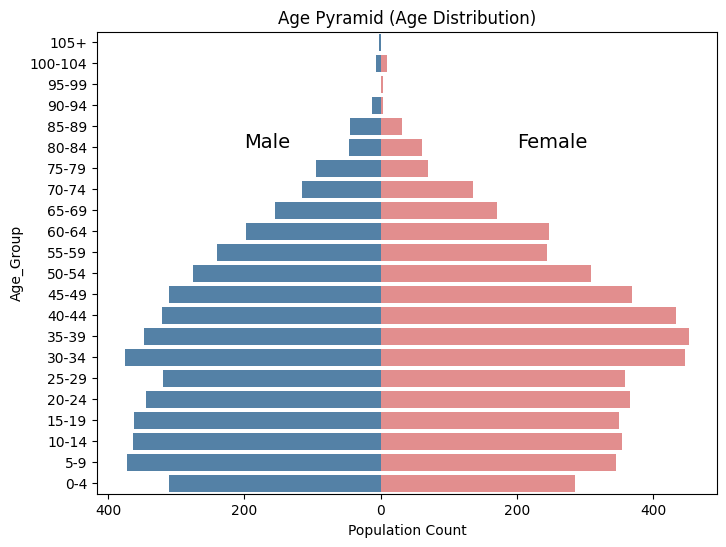

In [143]:
#Plot an Age pyramid using Age Group while assigning Males to the left and Females to the right

plt.figure(figsize=(8, 6))
plot = sns.barplot(x=p1, y=q1, order=bin_index, color='steelblue')
plot = sns.barplot(x=p2, y=q2, order=bin_index, color='lightcoral')
plt.text(-200,5, 'Male', fontsize=14)
plt.text(200,5, 'Female', fontsize=14)
plot.set(xlabel='Population Count',ylabel='Age_Group',title='Age Pyramid (Age Distribution)')
ax = plt.gca()
ax.set_xticklabels([abs(int(x)) for x in ax.get_xticks()]);

In [144]:
# Percentage of individuals 65 and above

old_aged = df[df['Age'] >= 65].Age.count()

print(f'Old_aged individuals accounted for {((old_aged/len(df)*100)):.2f}% of the total population')


# Percentage of individuals 25 and 49

young_people = df[(df['Age'] > 24) & (df['Age'] < 50)].Age.count()
print(f'Young individuals accounted for {((young_people/len(df)*100)):.2f}% of the total population')

#Total no of students in the population
total_students = len(df[df['Occupation_Category'] == 'Student'])

percent_student_population = (total_students/len(df))*100
print(f'{percent_student_population:.2f}% are students aged 18 and below')

# Percentage of individuals 20 and below

student_age = df[(df['Age'] < 19) & (df['Occupation_Category'] == 'Student')].Age.count()
print(f'Students below 19 accounted for {((student_age/total_students*100)):.2f}% of the total students')

Old_aged individuals accounted for 9.96% of the total population
Young individuals accounted for 38.64% of the total population
26.65% are students aged 18 and below
Students below 19 accounted for 77.12% of the total students


## Unemployment Trend

In [145]:
#Statistical Info based on occupation category
df.groupby(['Occupation_Category'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation_Category,,,,,,,,
Child,595.0,1.981513,1.394311,0.0,1.0,2.0,3.0,4.0
Employed,5166.0,42.382695,12.170843,19.0,32.0,41.0,52.0,67.0
Retired,776.0,76.418814,7.639531,65.0,71.0,74.0,81.0,107.0
Student,2574.0,13.544678,5.307723,5.0,9.0,14.0,18.0,31.0
Unemployed,547.0,41.773309,11.145712,16.0,33.0,41.0,50.0,64.0


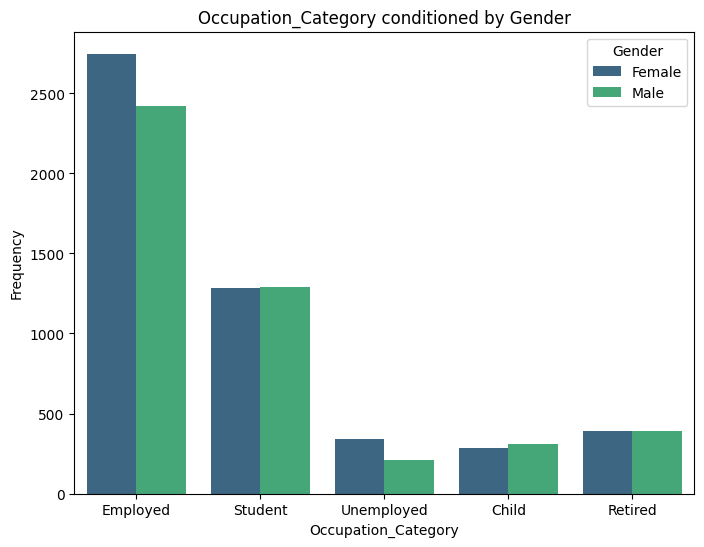

In [146]:
#Plot a countplot of Occupation category conditioned by Gender
plt.figure(figsize = [8, 6])
sns.countplot(data=df, x='Occupation_Category',hue='Gender', palette="viridis")
plt.title('Occupation_Category conditioned by Gender')
plt.xlabel('Occupation_Category')
plt.ylabel('Frequency');

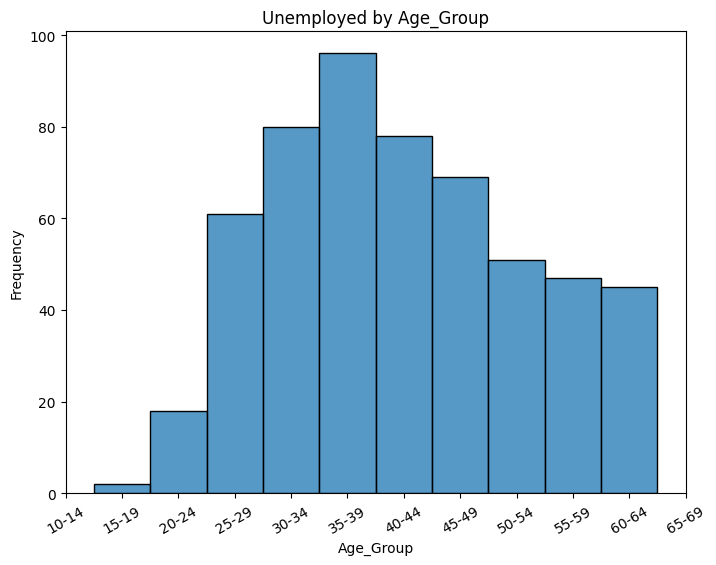

In [147]:
#Filter unemployed individuals from the occupation category created
selected = ['Unemployed']
filtered_unemployed = df[df["Occupation_Category"].isin(selected)]
filtered_unemployed.Surname.count()

#Plot a histogram of the filtered group
plt.figure(figsize = [8, 6])
sns.histplot(data=filtered_unemployed, x='Age_Group')
plt.title('Unemployed by Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('Frequency')
plt.xticks(rotation=30);

In [148]:
# Estimating employed women from the overall population
Overall_employed = len(df[(df['Occupation_Category'] == 'Employed')])

employed_women = len(df[(df['Occupation_Category'] == 'Employed') & (df['Gender'] =='Female')])

percent_employed_women = (employed_women/Overall_employed) * 100
print(f'The percentage of employed women in the population is {(percent_employed_women):.2f}%')

# Estimating the workforce in the dataset. this is the summation of employed and unemployed group

employed_workforce = (len(df[df['Occupation_Category'] == 'Employed']))
unemployed_workforce = (len(df[df['Occupation_Category'] == 'Unemployed']))
workforce = (employed_workforce + unemployed_workforce)
print(f'The number of workforce in the population is {workforce}')

#Percentage of unemployed by Workforce
percent_unemployed = (unemployed_workforce/workforce) * 100

print(f'{(percent_unemployed):.2f}% of the workforce accounted for the percentage of unemployed')

most_unemployed = len(df[(df['Age'] >= 30) & (df['Age'] <= 44) & (df['Occupation_Category'] == 'Unemployed')])
age_group_unemployed = (most_unemployed/unemployed_workforce) * 100
print(f'Individuals aged 30 to 44 accounted for {(age_group_unemployed):.2f}% of the unemployed workforce')

The percentage of employed women in the population is 53.19%
The number of workforce in the population is 5713
9.57% of the workforce accounted for the percentage of unemployed
Individuals aged 30 to 44 accounted for 46.44% of the unemployed workforce


## Religious Affiliation

In [149]:
#Statistical Details of Religion Column based on Age

df.groupby('Religion')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Religion,,,,,,,,
Catholic,1354.0,32.173560,19.669633,0.0,15.00,33.0,46.00,104.0
Christian,2794.0,40.755906,22.622935,0.0,21.00,41.0,59.00,104.0
Hindu,1.0,18.000000,NaN,18.0,18.00,18.0,18.00,18.0
Jewish,30.0,36.633333,18.159226,1.0,19.75,41.5,48.25,75.0
Methodist,826.0,33.858354,20.975149,0.0,16.00,34.0,48.00,103.0
Muslim,156.0,27.602564,18.003111,1.0,19.00,25.5,33.25,89.0
None,3968.0,35.173135,20.096792,0.0,21.00,34.0,48.00,107.0
Pagan,5.0,32.200000,26.147658,7.0,16.00,17.0,59.00,62.0
Sikh,77.0,28.363636,17.490531,2.0,19.00,29.0,33.00,84.0


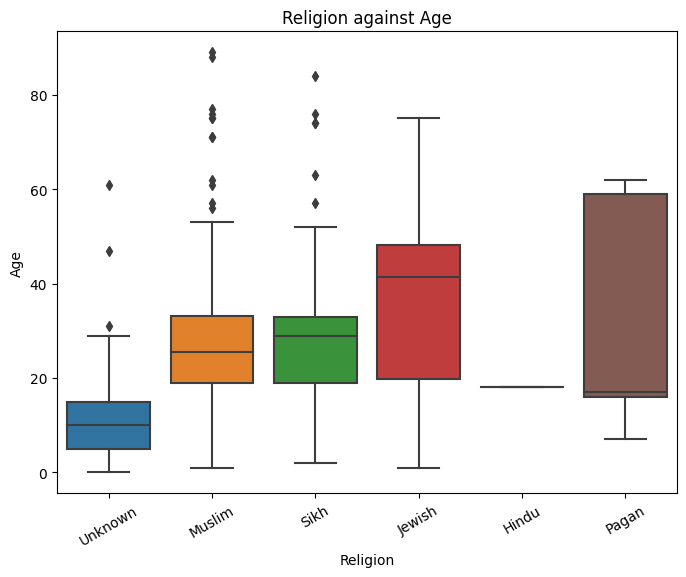

In [150]:
#Filtered least Religions
selected = ['Sikh','Jewish', 'Hindu', 'Pagan', 'Unknown', 'Muslim']
filtered_religion = df[df["Religion"].isin(selected)]

#Plot a box plot of Age against Religion
plt.figure(figsize = [8, 6])
sns.boxplot(data=filtered_religion, x='Religion', y='Age')
plt.title('Religion against Age')
plt.xticks(rotation=30);

In [151]:
#Create a new dataframe
religion = pd.DataFrame(df)

#extract Religion and Occupation Category columns
df_extract = religion.loc[:, ['Religion', 'Occupation_Category']]

#Create a new dataframe using pivot table
religion_occupation = df_extract.pivot_table(index=['Occupation_Category'], columns='Religion', aggfunc=len, fill_value=0)

#Print new dataframe
religion_occupation

Religion,Catholic,Christian,Hindu,Jewish,Methodist,Muslim,None,Pagan,Sikh,Unknown
Occupation_Category,,,,,,,,,,
Child,89,125,0,1,58,13,194,0,6,109
Employed,738,1524,0,18,434,80,2324,2,41,5
Retired,59,367,0,1,61,8,276,0,4,0
Student,383,618,1,8,219,50,941,3,19,332
Unemployed,85,160,0,2,54,5,233,0,7,1


In [152]:
#Create a new dataframe
religion = pd.DataFrame(df)

#extract Religion and Occupation Category columns
df_new = religion.loc[:, ['Religion', 'Gender']]

#Create a new dataframe using pivot table
religion_gender = df_new.pivot_table(index=['Gender'], columns='Religion', aggfunc=len, fill_value=0)

#Print new dataframe
religion_gender

Religion,Catholic,Christian,Hindu,Jewish,Methodist,Muslim,None,Pagan,Sikh,Unknown
Gender,,,,,,,,,,
Female,729,1483,0,15,452,72,2020,4,43,223
Male,625,1311,1,15,374,84,1948,1,34,224


In [153]:
# Percent of Christians aged 18 and 64

christians_range = len(df[(df['Age'] >= 18) & (df['Age'] <= 64) & (df['Religion'] =='Christian')])
christians = len(df[(df['Religion'] =='Christian')])
percent_christians = (christians_range/christians) * 100
print(f'{(percent_christians):.2f}% of Christians were aged 18 and 64')

63.21% of Christians were aged 18 and 64


**As seen from the pandas profiling of the religion column, 4.6% of the population had an unknown religion, and this is because they had joked with the census program, chose not to indicate their religion, or had no head of the house, as in the case of individuals below 18**

## Divorce and Marriage Rate

In [154]:
#Statistical Details of Marital Status Column based on Age

df.groupby('Marital_Status')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Divorced,847.0,40.073200,16.099112,19.0,28.0,37.0,49.0,102.0
Married,2652.0,50.792232,16.731132,18.0,38.0,49.0,63.0,107.0
Minor,2434.0,8.725555,5.067837,0.0,5.0,9.0,13.0,17.0
Single,3411.0,37.245089,13.570292,16.0,26.0,36.0,47.0,85.0
Widowed,314.0,64.391720,19.540146,19.0,62.0,70.0,77.0,104.0


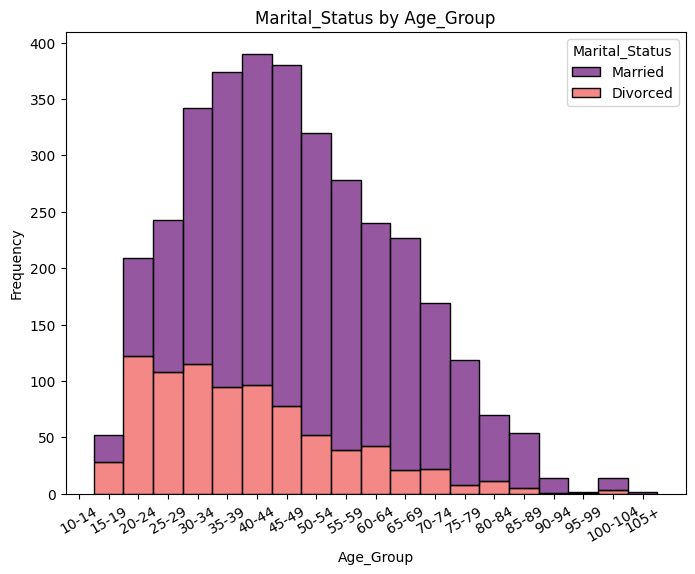

In [155]:
#Filtered Divorced and Married individuals
selected = ['Divorced','Married']
filtered_marital_status = df[df["Marital_Status"].isin(selected)]

#Plot a histogram of Age Group conditioned by Marital Status of the filtered groups
plt.figure(figsize = [8, 6])
sns.histplot(data=filtered_marital_status, x='Age_Group',hue='Marital_Status',multiple='stack', palette="magma")
plt.title('Marital_Status by Age_Group')
plt.ylabel('Frequency')
plt.xticks(rotation = 30);

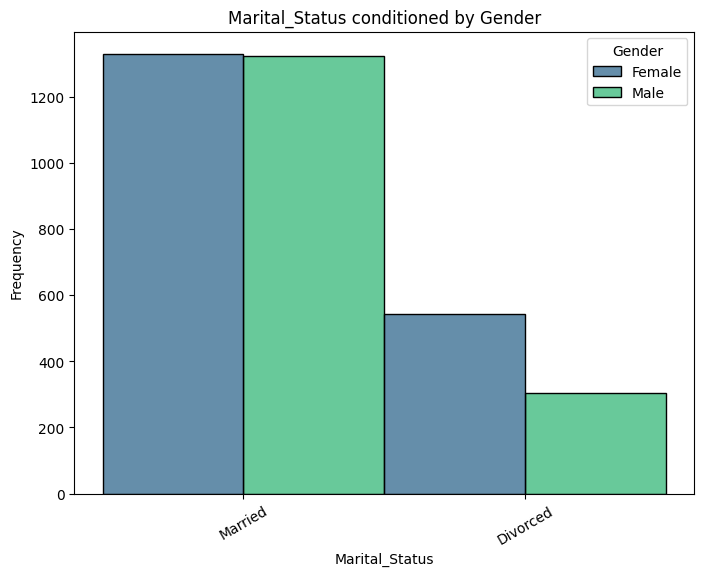

In [156]:
#Filtered Divorced and Married individuals
selected = ['Divorced','Married']
filtered_marital_status = df[df["Marital_Status"].isin(selected)]

#Plot a histogram of Age Group conditioned by Marital Status of the filtered groups
plt.figure(figsize = [8, 6])
sns.histplot(data=filtered_marital_status, x='Marital_Status',hue='Gender',multiple='dodge', palette="viridis")
plt.title('Marital_Status conditioned by Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 30);

In [157]:
#Create a new dataframe
mar_divorce = pd.DataFrame(df)

#extract Gender and Marital status columns
df_extract = mar_divorce.loc[:, ['Marital_Status', 'Gender']]

#Create a new dataframe using pivot table
new_ = df_extract.pivot_table(index=['Gender'], columns='Marital_Status', aggfunc=len, fill_value=0)

#Print new dataframe
new_

Marital_Status,Divorced,Married,Minor,Single,Widowed
Gender,,,,,
Female,542,1330,1177,1808,184
Male,305,1322,1257,1603,130


In [158]:
#Group by individuals who are married
Married_individuals = df.groupby(['Marital_Status']).size().Married

# Group by individuals who are divorced
Divorced_individuals = df.groupby(['Marital_Status']).size().Divorced

# Group by individuals who are widowed
Widowed_individuals = df.groupby(['Marital_Status']).size().Widowed

# Total no of adults that have gotten to the age of marriage. Assuming 18 as a reference age for married adults
total_adults = df[df['Age'] >= 18].Age.count()

# % of those married
Married_percent = (Married_individuals/total_adults) * 100
print(f'The % of those married in the town was {(Married_percent):.2f}%')

# Total no of adults that have gotten to the age of divorce. Assuming an individual can file for divorce a year after been married
divorce_adults_age = df[df['Age'] >= 19].Age.count()

# % of those divorced
Divorced_percent = (Divorced_individuals/divorce_adults_age) * 100
print(f'The % of those divorced in the town was {(Divorced_percent):.2f}%')

women_divorced = len(df[(df['Marital_Status'] == 'Divorced') & (df['Gender'] == 'Female')])

women_percent = (women_divorced/Divorced_individuals) * 100

print(f'The % of women divorced in the town was {(women_percent):.2f}%')

The % of those married in the town was 36.73%
The % of those divorced in the town was 11.97%
The % of women divorced in the town was 63.99%


#### For estimating crude marriage and divorce rate, we use the sum of those married and who have been married before i.e widowed and divorced as reference

In [159]:
# Summation of those married

Total_married_population = Divorced_individuals + Married_individuals + Widowed_individuals
print(f'The total married population were {Total_married_population} i.e {((Total_married_population)/len(df))*100:.2f}% of the total population')

#Crude divorce rate per year over the past 5 years
Divorced_individuals = Divorced_individuals/5
crude_divorce_rate = (Divorced_individuals/Total_married_population) * 1000
print(f'For every 1000 individuals that were once married, {crude_divorce_rate:.2f} are divorced i.e {crude_divorce_rate/10:.2f}%')

#Crude marriage rate per year over the past 5 years
Married_individuals = Married_individuals/5
crude_marriage_rate = (Married_individuals/Total_married_population) * 1000
print(f'For every 1000 individuals that were once married, {crude_marriage_rate:.2f} are married i.e {crude_marriage_rate/10:.2f}%')

The total married population were 3813 i.e 39.48% of the total population
For every 1000 individuals that were once married, 44.43 are divorced i.e 4.44%
For every 1000 individuals that were once married, 139.10 are married i.e 13.91%


## Occupancy Level

In [160]:
#Statistical Summary of Households
df.groupby('Household')['Relationship_to_Head_of_House'].describe().T

Household,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,20,21,22
count,672,1664,1554,2788,1760,660,105,16,54,60,110,36,13,28,16,17,40,21,44
unique,1,17,19,21,18,16,10,5,9,9,7,4,6,5,4,6,6,5,7
top,Head,Head,Head,Head,Son,Son,Son,None,Daughter,Daughter,None,Daughter,Lodger,None,Lodger,Daughter,Lodger,Daughter,Lodger
freq,672,832,518,697,407,179,36,7,16,14,30,17,7,12,9,8,15,9,19


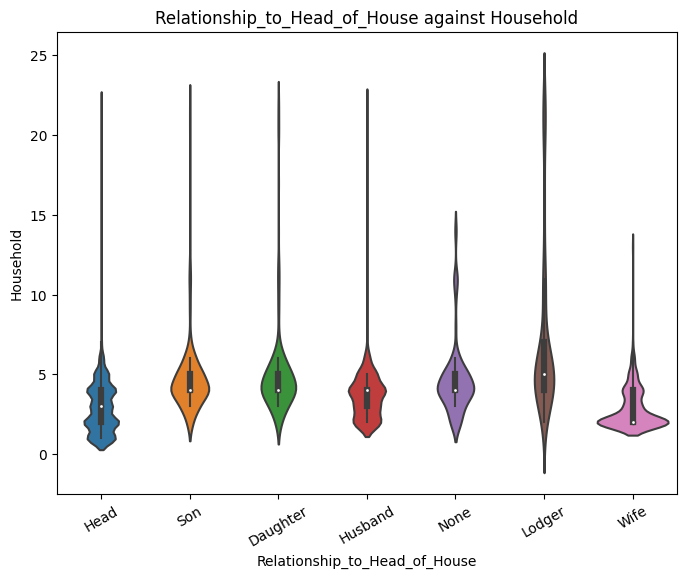

In [161]:
#Filter top 10 relationship to head of house
filtered_household = df[df['Household'].between(0,22)]
count_ = filtered_household['Relationship_to_Head_of_House'].value_counts()[0:7]

#Plot a boxplot of Relationship to Head of House against Household
plt.figure(figsize = [8, 6]) 
sns.violinplot(data=filtered_household, x='Relationship_to_Head_of_House',  y='Household', order=count_.index) 
plt.title('Relationship_to_Head_of_House against Household') 
plt.ylabel('Household') 
plt.xticks(rotation=30);

In [162]:
#Household count
no_occupancy = df.groupby(['Household'])['House_Number'].count()

#No of house
houses = no_occupancy.values/no_occupancy.index

#Converting to integer
houses = houses.astype(int)

#Creating occupancy dataframe
occupancy = pd.DataFrame({'No_of_individuals':no_occupancy.values, 'No_of_Houses':houses},index=no_occupancy.index)

occupancy.T

Household,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,20,21,22
No_of_individuals,672,1664,1554,2788,1760,660,105,16,54,60,110,36,13,28,16,17,40,21,44
No_of_Houses,672,832,518,697,352,110,15,2,6,6,10,3,1,2,1,1,2,1,2


In [163]:
#No of Houses greater with households greater than 4

overused_house = occupancy[occupancy['No_of_Houses'] < 518]['No_of_Houses'].sum()

print(f'There are {overused_house} overused houses in the city')

Total_houses = 3233
sufficiently_occupied = 697

percent_overused = (overused_house/Total_houses) * 100

print(f'{percent_overused:.2f}% were overused houses')

underused_house = Total_houses - (sufficiently_occupied + overused_house)
percent_underused = (underused_house/Total_houses) * 100

print(f'{percent_underused:.2f}% were underused houses')

There are 514 overused houses in the city
15.90% were overused houses
62.54% were underused houses


In [164]:
#Create a new dataframe
household = pd.DataFrame(df)

#extract Household, Gender and Marital status columns
df_extract = household.loc[:, ['Household', 'Marital_Status', 'Gender']]

#Create a new dataframe using pivot table
household_status = df_extract.pivot_table(index=['Marital_Status', 'Gender'], columns='Household', aggfunc=len, fill_value=0)

#Print new dataframe
household_status

Household               1    2    3    4    5    6   7   8   9   10  11  12  \
Marital_Status Gender                                                         
Divorced       Female   89   82   73  127   95   40   6   0   5   4   4   2   
               Male     74   22   22   74   43   36   4   2   3   2  10   2   
Married        Female    0  423  251  378  195   58   5   1   4   1   3   3   
               Male      0  431  247  372  191   56   5   1   4   1   3   3   
Minor          Female    0   73  217  404  295  107  19   0   8  12  21   2   
               Male      0   81  244  442  304  110  20   1   9   9  18   0   
Single         Female  169  284  244  507  335  128  21   6  13  13  25  13   
               Male    170  229  230  450  279  117  20   5   8  17  25  11   
Widowed        Female   90   29   17   23   13    3   4   0   0   0   1   0   
               Male     80   10    9   11   10    5   1   0   0   1   0   0   

Household              13  14  16  17  20  21  22  
Marital_Status Gender                              
Divorced       Female   1   0   2   1   2   3   6  
               Male     1   2   2   0   2   1   3  
Married        Female   1   3   0   1   2   0   1  
               Male     1   3   0   1   2   0   1  
Minor          Female   2   0   0   3   8   1   5  
               Male     0   4   0   2   4   5   4  
Single         Female   2   9   4   5  10  10  10  
               Male     3   6   8   4  10   1  10  
Widowed        Female   0   0   0   0   0   0   4  
               Male     2   1   0   0   0   0   0

In [165]:
#Estimating divorcees in over_used houses

divorcee_over_used = len(df[(df['Marital_Status'] == 'Divorced') & (df['Household'] > 4)])

female_divorcee = len(df[(df['Marital_Status'] == 'Divorced') & (df['Household'] > 4) & (df['Gender'] == 'Female')])

overcrowded_count = len(df[df['Household'] > 4])

percent_divorcee = (divorcee_over_used/overcrowded_count)*100
print(f'Divorcee occupied {percent_divorcee:.2f} of overused houses')

percent_women = (female_divorcee/divorcee_over_used)*100
print(f'Divorced women occupied {percent_women:.2f} of overused houses')

Divorcee occupied 9.53 of overused houses
Divorced women occupied 60.21 of overused houses


In [166]:
# Estimating singles in overused houses

singles_overused = len(df[(df['Marital_Status'] == 'Single') & (df['Household'] > 4)])

percent_singles = (singles_overused/overcrowded_count)*100
print(f'Singles occupied {percent_singles:.2f} of overused houses')


Singles occupied 37.85 of overused houses


## Commuters and University Students

In [167]:
#Filter University students including PhD students
filtered_students = ['PhD Student', 'University Student']

#Extract university students using isin function and count
University_students = df[df['Occupation'].isin(filtered_students)].Occupation.count()

#Total no of University students
University_students

#Filter employed individuals 
filter_employed = ['Employed']

#Extract employed using isin function and count 
employed = df[df['Occupation_Category'].isin(filter_employed)].Occupation.count()

#Total no that are employed
employed

#Assuming all the above are non_commuters
non_commuting_occupation = ['writer', 'teacher', 'retail', 'community', 'local government', 'barista']
new_list = []
for no, row in df.iterrows():
    occupation = row['Occupation'].lower()
    if any(i in occupation for i in non_commuting_occupation):
        new_list.append(row)       
len(new_list)

#employed commuters
commuters_employed = (employed - len(new_list))

#Total no of commuters
total_commuters = (University_students + commuters_employed)
total_commuters

5482

### Percentage by Total Population

In [168]:
#Overall population
Overall_Population = len(df)

#% of student by Overall population
student_by_population = (University_students/Overall_Population) * 100

print('\033[1mTotal % of Student Commuters: \033[0m')
print(f'The total no of commuters that are students were {student_by_population:.2f}% of the overall population')

#% of employed by Overall population
employed_by_population = (commuters_employed/Overall_Population) * 100

print('\033[1mTotal % of Employed Commuters: \033[0m')
print(f'The total no of commuters that are employed were {employed_by_population:.2f}% of the overall population')

#% of commuters by Overall population
commuters_by_population = (total_commuters/Overall_Population) * 100

print('\033[1mTotal % of Commuters: \033[0m')
print(f'The total no of commuters were {commuters_by_population:.2f}% of the overall population')

Total % of Student Commuters: 
The total no of commuters that are students were 6.39% of the overall population
Total % of Employed Commuters: 
The total no of commuters that are employed were 50.37% of the overall population
Total % of Commuters: 
The total no of commuters were 56.76% of the overall population


### Percentage by Total Commuters

In [169]:
#% of Student by Commuters
student_by_commuters = (University_students/total_commuters) * 100
print(f'The total no of commuters that are students were {student_by_commuters:0.2f}% of the total commuters')

#% of Employed by Commuters
employed_by_commuters = (commuters_employed/total_commuters) * 100
print(f'The total no of commuters that are employed were {employed_by_commuters:0.2f}% of the total commuters')

The total no of commuters that are students were 11.26% of the total commuters
The total no of commuters that are employed were 88.74% of the total commuters


In [170]:
#Employed Migrants
employed_lodger = df[(df['Relationship_to_Head_of_House'] == 'Lodger') & (df['Occupation_Category'] == 'Employed')]
employed_lodger.Occupation.count()

employed_visitor = df[(df['Relationship_to_Head_of_House'] == 'Visitor') & (df['Occupation_Category'] == 'Employed')]
employed_visitor.Occupation.count()

total_employed_migrants = employed_visitor.Occupation.count() + employed_lodger.Occupation.count()
total_employed_migrants

340

In [171]:
#Employed Migrants
student_lodger = df[(df['Relationship_to_Head_of_House'] == 'Lodger') & (df['Occupation_Category'] == 'Student')]
student_lodger.Occupation.count()

student_visitor = df[(df['Relationship_to_Head_of_House'] == 'Visitor') & (df['Occupation_Category'] == 'Student')]
student_visitor.Occupation.count()

total_student_migrants = student_visitor.Occupation.count() + student_lodger.Occupation.count()
total_student_migrants

41

In [172]:
#Percentage of migrants that are commuters
total_migrants = total_employed_migrants + total_student_migrants

percent_migrants = (total_migrants/total_commuters)*100

print(f'Migrants make up {percent_migrants:.2f}% of the total commuters')

Migrants make up 6.95% of the total commuters


## Birth and Death Rate

### Birth Rate

In [173]:
#Select births in the past 5 years
selected_ages = [0, 1, 2, 3, 4]
filtered_age = df[df['Age'].isin(selected_ages)]

#Total years
no_of_ages = len(selected_ages)

#Total births in 5 years
total_births = filtered_age.Age.count()

#Mean births in 5 years
mean_births = total_births/no_of_ages

#Crude Birth Rate per 1000 of the overall population
Crude_Birth_Rate = (mean_births/Overall_Population) * 1000

print(f'The crude birth rate over the past 5 years was {Crude_Birth_Rate:.2f} per year, for every 1000 in the overall population')

The crude birth rate over the past 5 years was 12.32 per year, for every 1000 in the overall population


### Death Rate

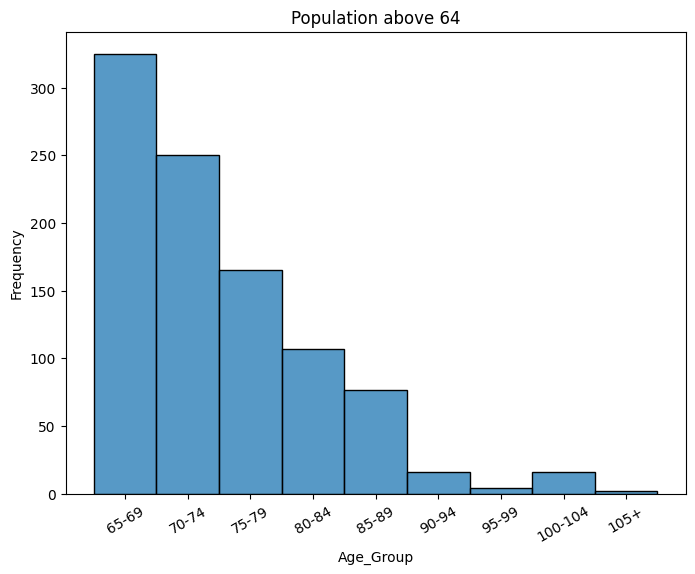

In [174]:
filtered_age = df[df['Age'].between(65,109)]

#Plot a histogram of the selected ages
plt.figure(figsize = [8, 6])
sns.histplot(data=filtered_age, x='Age_Group')
plt.title('Population above 64')
plt.ylabel('Frequency')
plt.xticks(rotation = 30);

In [175]:
#Filter between 65 and above Age Group
df[df['Age'].between(65,109)]['Age_Group'].value_counts()[0:9]

65-69      325
70-74      250
75-79      165
80-84      107
85-89       77
100-104     16
90-94       16
95-99        4
105+         2
Name: Age_Group, dtype: int64

In [176]:
#Death Rate will be estimated using the difference in above age groups

#Differences in Age Group counts from 65 and above
Deaths = ((325-250)+(250-165)+(165-107)+(107-77)+(77-16)+(16-16)+(16-4)+(4-2))
Deaths_in_year = Deaths/5

#Estimate Death Rate per 1000
Crude_Death_Rate = (Deaths_in_year/Overall_Population) * 1000

#Print desired result
print(f'The crude death rate between ages of 65 and above are {Crude_Death_Rate:.2f} deaths per year for every 1000 individuals in the overall population')

The crude death rate between ages of 65 and above are 6.69 deaths per year for every 1000 individuals in the overall population


### 10 years projection of students and old aged people

In [177]:
# Calculating individuals 0 to 7 since the max age of a school aged children is 17, we obtain;

# Those 0 and 7
studs = len(df[(df['Age'] >= 0) & (df['Age'] <= 7)])

# future births using crude birth rate to estimate 10 years, i.e aged 5-9 meaning 5 years
stud_births = (9.568 * Crude_Birth_Rate) * 5

#Future students become;
future_students = studs + stud_births

print(f'The total number of future school aged children based on a 10 years projection is {round(future_students)}')

percent_students = ((future_students/len(df))*100)
print(f'{percent_students:.2f}% will make up the total number of future school aged children')

The total number of future school aged children based on a 10 years projection is 1625
16.83% will make up the total number of future school aged children


In [178]:
# The maximum age one can live is 122, and adding age 55 and 60, assuming the old age starts from 65;

#Individuals age 55 and 117, considering the oldest individual in the city is currently 107
mid_50 = len(df[(df['Age'] >= 55) & (df['Age'] <= 117)])

# future deaths using crude death rate to estimate 10 years
old_deaths = ((len(df)/1000) * Crude_Death_Rate) * 10

future_aged = mid_50 - old_deaths

print(f'The total number of future old aged based on assumption is {round(future_aged)}')

percent_aged = ((future_aged/len(df))*100)
print(f'{percent_aged:.2f}% make up the total number of old_aged class')

The total number of future old aged based on assumption is 1245
12.89% make up the total number of old_aged class
